In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm, zscore
from scipy.interpolate import make_interp_spline

In [2]:
cutoff_convergence = np.load('input/cutoff_convergence.npy')

In [3]:
overall_cuts = np.percentile(cutoff_convergence, 95, axis=1)

In [4]:
ale_cuts = np.empty(1000000,)
cluster_cuts = np.empty(1000000,)
with h5py.File('input/cutoff_convergence_10k.hdf5', 'r') as f:
    for i in range(100):
        ale_cuts[10000*i:10000*(i+1)] = f[f'ale/{i}'][:]
        cluster_cuts[10000*i:10000*(i+1)] = f[f'cluster/{i}'][:]

        
ale_slices = {}
cluster_slices = {}
tfce_slices = {}
ts = ale_cuts.size

for ss in [1000, 2500, 5000, 10000, 20000]:
    ale_tmp = []
    cluster_tmp = []
    tfce_tmp = []
    for i in range(1000):
        ale_tmp.append(np.percentile(np.random.choice(cutoff_convergence[0], size=ss, replace=False), 95))
        cluster_tmp.append(np.round(np.percentile(np.random.choice(cutoff_convergence[1], size=ss, replace=False), 95)))
        tfce_tmp.append(np.percentile(np.random.choice(cutoff_convergence[2], size=ss, replace=False), 95))
    ale_slices[f'{ss}'] = ale_tmp
    cluster_slices[f'{ss}'] = cluster_tmp
    tfce_slices[f'{ss}'] = tfce_tmp

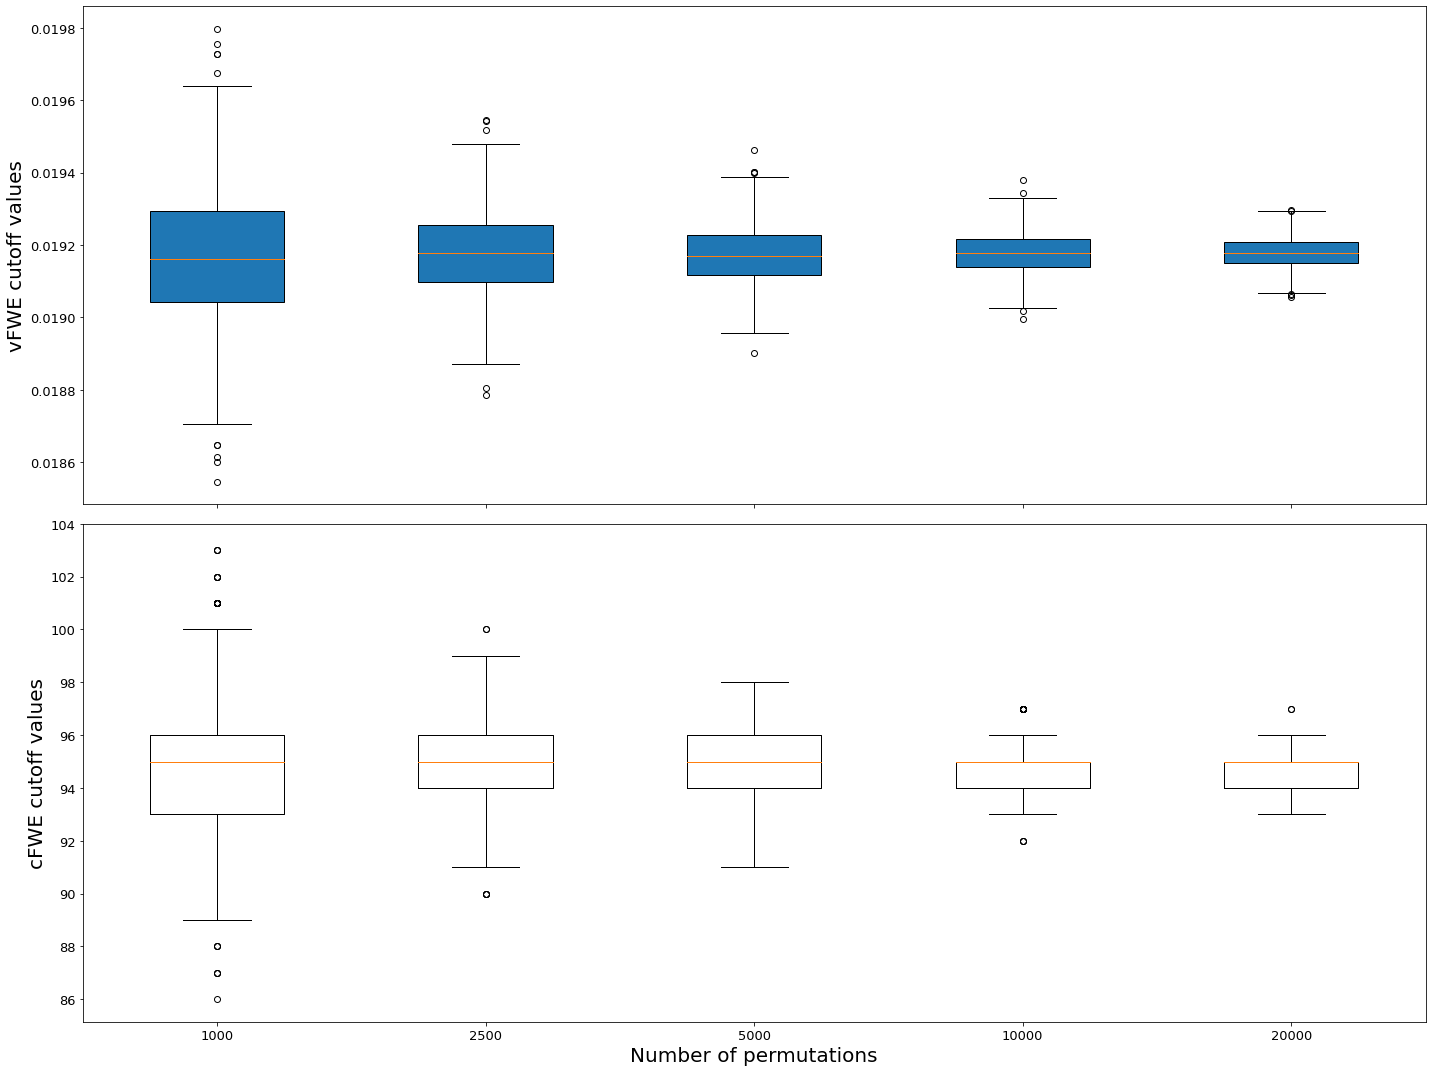

In [16]:
fig, ax = plt.subplots(2,1,figsize=(20,15), sharex=True)

#fig.suptitle('Cutoff convergence', fontsize=25)
ax[0].boxplot(ale_slices.values(), patch_artist=True)
ax[0].set_ylabel('vFWE cutoff values', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[1].boxplot(cluster_slices.values())
ax[1].set_xticks([1,2,3,4,5])
ax[1].set_xticklabels(cluster_slices.keys())
ax[1].set_yticks(np.arange(86,105,2))
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[1].set_ylabel('cFWE cutoff values', fontsize=20)
ax[1].set_xlabel('Number of permutations', fontsize=20)

fig.tight_layout()


In [5]:
bars1 = np.array([np.std(ale_slices[cuts]) for cuts in ale_slices.keys()])
percent_variance1 = bars1 / overall_cuts[0] * 100

bars2 = [np.std(cluster_slices[cuts]) for cuts in cluster_slices.keys()]
percent_variance2 = bars2 / overall_cuts[1] * 100

bars3 = [np.std(tfce_slices[cuts]) for cuts in tfce_slices.keys()]
percent_variance3 = bars3 / overall_cuts[2] * 100

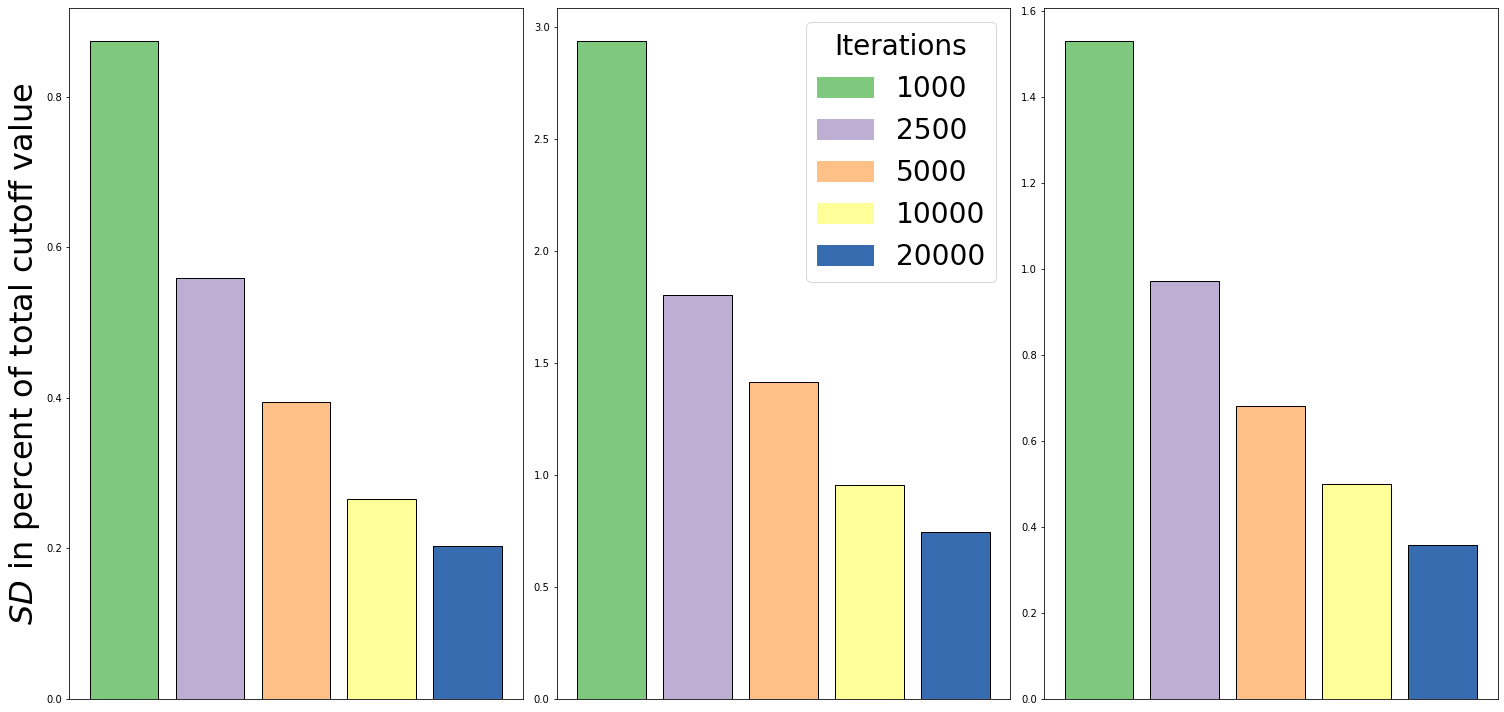

In [6]:
my_cmap = plt.get_cmap("Accent")
fig, ax = plt.subplots(1,3,figsize=(21,10))

# width of the bars
barWidth = 0.8
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
ax[0].bar(r1, percent_variance1, width = barWidth, color = my_cmap.colors, edgecolor = 'black', capsize=7)
ax[0].set_xticks([])
ax[0].set_ylabel('$SD$ in percent of total cutoff value', fontsize=32)
#ax[0].set_yticks(np.arange(0,0.26,0.05))
#ax[0].set_yticklabels(np.round(np.arange(0,0.26,0.05),3), fontsize=20)

# Create cyan bars
ax[1].bar(r1, percent_variance2, width = barWidth, color = my_cmap.colors, edgecolor = 'black', capsize=7)
ax[1].set_xticks([])
#ax[1].set_yticks(np.arange(0,3.1,0.5))
#ax[1].set_yticklabels(np.round(np.arange(0,3.1,0.5),3), fontsize=20)

# Create cyan bars
ax[2].bar(r1, percent_variance3, width = barWidth, color = my_cmap.colors, edgecolor = 'black', capsize=7)
ax[2].set_xticks([])
#ax[2].set_yticks(np.arange(0,5.1,1))
#ax[2].set_yticklabels(np.round(np.arange(0,5.1,1),3), fontsize=20)

labels=['1000','2500','5000','10000','20000']
handles = [plt.Rectangle((0,0),1,1, color=my_cmap.colors[i]) for i,label in enumerate(labels)]
ax[1].legend(handles, labels, title="Iterations", fontsize=28, title_fontsize=28)

fig.tight_layout()